# **0.Libraries**

In [189]:
!pip install pandas-profiling==2.7.1
!pip install xgboost

In [190]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# **1. Dataset**

In [191]:
df = pd.read_csv(r'C:\Users\g_fma\OneDrive\Área de Trabalho\DOCS\data_projects\sonda_telecom\sonda_telecom_database.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1.1 **Variable Dictionary**
<ol>
<li>customerID = ID do cliente</li>
<li>gender = Sexo do cliente</li>
<li>SeniorCitizen = Senioridade (1 para idoso, 0 para não idoso)</li>
<li>Partner = Tem um parceiro?</li>
<li>Dependents = Tem filhos?</li>
<li>tenure = Quantidade de meses que se mantêm com o serviço</li>
<li>PhoneService = Tem serviço de telefone?</li>
<li>MultipleLines = Tem mais de uma linha de telefone?</li>
<li>InternetService = Tem serviço de internet?</li>
<li>OnlineSecurity = Tem serviço de segurança?</li>
<li>OnlineBackup = Tem serviço de backup?</li>
<li>DeviceProtection = Tem serviço de proteção do aparelho?</li>
<li>TechSupport = Tem serviço de suporte técnico</li>
<li>StreamingTV = Tem serviço de streaming de TV</li>
<li>StreamingMovies = Tem serviço de streaming para filmes</li>
<li>Contract = Tipo do contrato</li>
<li>PaperlessBilling = Pagamento sem papel</li>
<li>PaymentMethod = Método de pagamento</li>
<li>MonthlyCharges = Custo mensal</li>
<li>TotalCharges = Custo total</li>
<li>Churn = Cancelou o plano? (TARGET)</li>
</ol>

# **2. Exploratory Analysis**

In [192]:
df.shape

(7043, 21)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [194]:
profile = ProfileReport(df, minimal=True)
profile

Summarize dataset: 30it [00:00, 128.53it/s, Completed]
Render HTML: 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]


## 2.1 Feature Selection

### 2.1.1 Features Analysis
**Análise Geral**
<li>SeniorCitizen está um muito desbalanceado = 6000 / 1000</li>
<li>Dependents está um pouco desbalanceado = 5000 / 2000</li>
<li>tenure não tem comportamento normal</li>
<li>tenure tem 11 zeros</li>
<li>Devemos verificar se há ouliers em tenure para analisar</li>
<li>PhoneService está um muito desbalanceado = 6000 / 700</li>
<li>Devemos verificar se há outliers em MonthlyCharges e TotalCharges para analisar</li>
<li>TotalCharges foi dado como Categorico, devemos investigar</li>

**TARGET** bem desbalanceado = 5000 NO / 2000 YES

**Variáveis que não agregam valor a análise:**
<li>customerID</li>
<li>PhoneService ?? Vou manter apesar do desbalanceamento - Avaliar depois</li>
<li>SeniorCitizen ?? Vou manter apesar do desbalanceamento - Avaliar depois</li>

In [195]:
df.drop(columns='customerID',inplace=True)

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

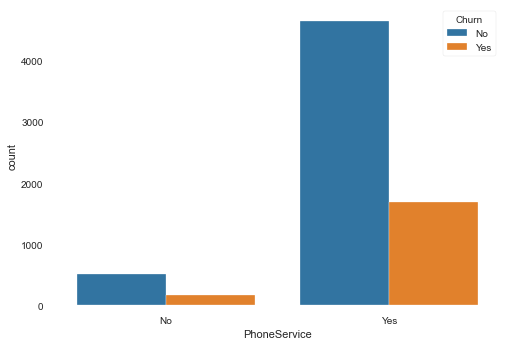

In [196]:
sns.countplot(x='PhoneService',hue='Churn',data=df)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

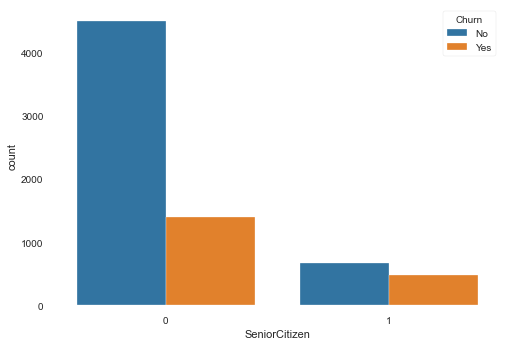

In [197]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)

## 2.2 Data Cleaning

### 2.2.1 Blank Rows
<li>Tenure tinha 11 zeros, não faz sentido com o problema - AVALIAR</li>

In [198]:
df[df['tenure']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Temos apenas 11 valores nesta situação com possível erro de preenchimento, umas vez que não faz sentido a presença da coluna Churn estar preenchida como "No", MonthlyCharges preenchida com valores acima de zero e os clientes possuirem Tenure igual a zero. Além disso por conta do Tenure zerado não é possível realizar o cálculo para uma aproximação do valor TotalCharge.

Nesse caso, por estarmos considerando 11 valores dentro de 7043, ou seja, 0.15% as linhas serão excluidas para não interferir nos próximos passos.

In [199]:
df.drop(df[df['tenure']==0].index,axis=0, inplace=True)

In [200]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [201]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


### 2.2.1 Outliers
<li>tenure</li>
<li>MonthlyCharges</li>
<li>TotalCharges</li>

Nenhum dos dados apresentam outliers

C:\Users\g_fma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure'>

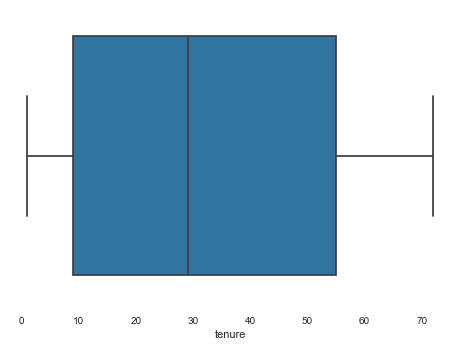

In [202]:
sns.boxplot(df['tenure'])

C:\Users\g_fma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges'>

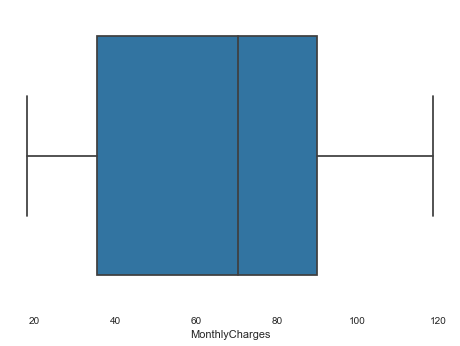

In [203]:
sns.boxplot(df['MonthlyCharges'])

C:\Users\g_fma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalCharges'>

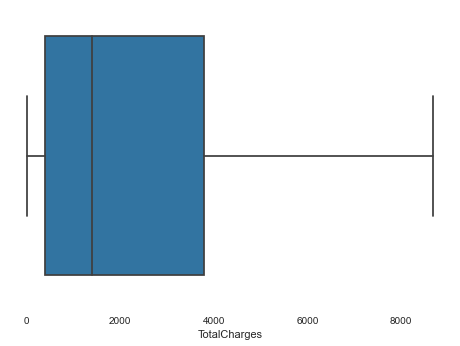

In [204]:
sns.boxplot(df['TotalCharges'])

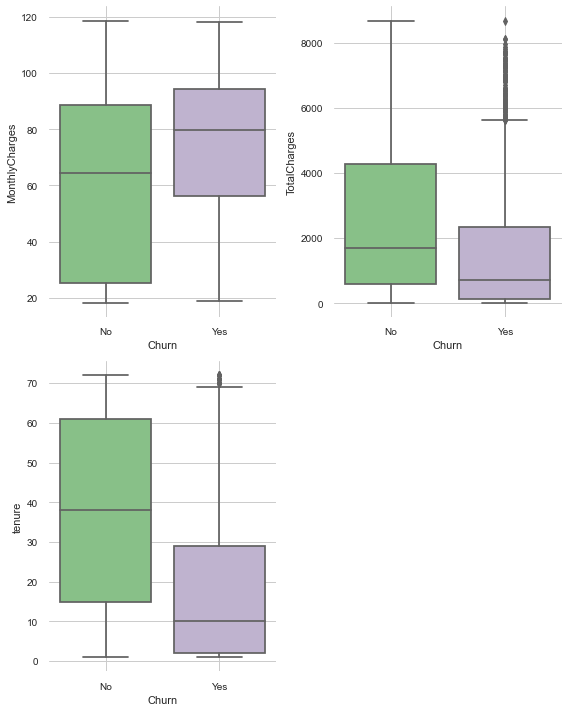

In [205]:
ax = plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sns.boxplot(data=df, y="MonthlyCharges", x="Churn", palette="Accent")
plt.grid(True)
plt.subplot(2,2,2)
sns.boxplot(data=df, y="TotalCharges", x="Churn", palette="Accent")
plt.grid(True)
plt.subplot(2,2,3)
sns.boxplot(data=df, y = "tenure", x="Churn", palette="Accent")
plt.grid(True)

plt.tight_layout()
plt.show()

# **3. Feature Engineering**

### 3.1 DataType
<li>Padronizar os dados YES e NO</li>

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [207]:
df.describe(include='object').transpose()

,count,unique,top,freq
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094
TechSupport,7032,3,No,3472


In [208]:
for i in df.columns:
    df[i].replace(to_replace=['No','No phone service','No internet service'], value=0, inplace=True)
    df[i].replace(to_replace=['Yes','Fiber optic','DSL'], value=1, inplace=True)

In [209]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,1,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,1,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0


## 3.1 Construct Data

### 3.1.1 OneHot Encoder

In [210]:
df = pd.get_dummies(df,columns=['gender','Contract','PaymentMethod'])

In [211]:
df.head(2)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1


### 3.1.2 New Feature
<li>NumberServices</li>

In [212]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [213]:

df['NumberServices'] = df.apply(lambda x: x['PhoneService']+x['InternetService']+x['OnlineSecurity']+x['OnlineBackup']+x['DeviceProtection']+x['TechSupport']+x['StreamingTV']+x['StreamingMovies'], axis=1)
df['NumberServices'].describe()

count    7032.000000
mean        3.725256
std         2.099542
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         8.000000
Name: NumberServices, dtype: float64

In [214]:
profile = ProfileReport(df, minimal=True)
profile

Summarize dataset: 37it [00:00, 168.98it/s, Completed]
Render HTML: 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


<AxesSubplot:>

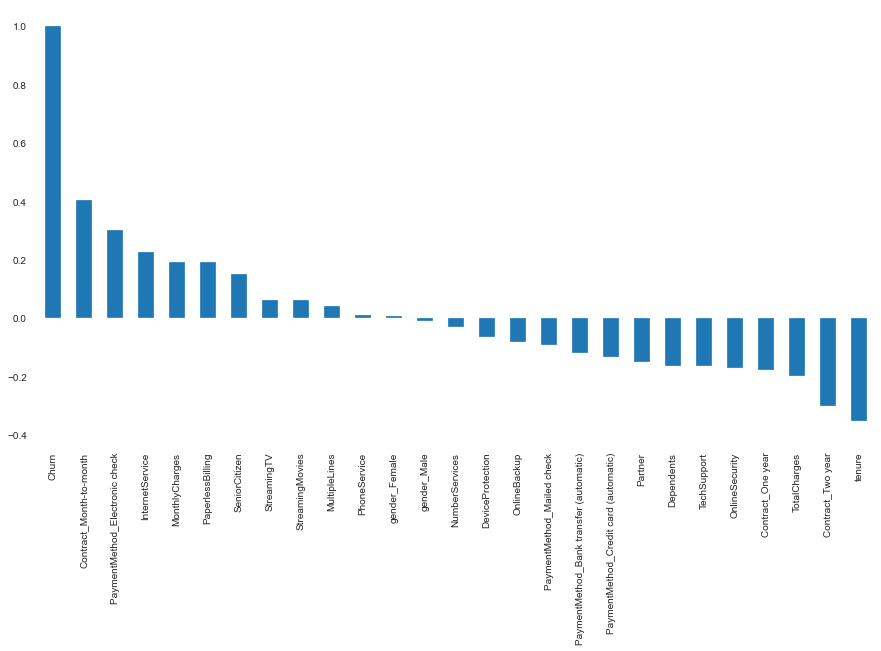

In [215]:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

# **4. Modeling**

## 4.1 Select Technique
**Análises Obtidas**
<li>Temos um Target desbalanceado</li>
<li>Problema de Classificação - Modelo Supervisionado</li>

**Métricas de Avaliação**
<li>F1</li>
<li>Recall</li>
<li>Precisão</li>

**Modelos Avaliados**
<li>Logistic Regression - Sklearn</li>
<li>KNN - Sklearn</li>
<li>Naive Bayes - Sklearn</li>
<li>Rede Neural - Sklearn</li>
<li>Random Forest - Sklearn</li>
<li>XGBoost - XGB</li>

Os treinamentos serão feitos considerando os hiperparametros dados por default, com uma massa de teste aleatória de 30%

O modelo com maior **RECALL** será segregado para etapa de tunning de seus hiperparametros

In [216]:
# Traçando uma Base Line
base_line = df[df['Churn']==0].value_counts().sum()/df['Churn'].value_counts().sum()*100
base_line

73.42150170648463

In [217]:
df_1 = df[df['Churn'] == 1]
df_0 = df[df['Churn'] == 0].sample(n=2000)
df_balanced = df_1.append(df_0)

In [218]:
X = df_balanced.drop(columns='Churn')
y = df_balanced['Churn']

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [220]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3095, 26)
(774, 26)
(3095,)
(774,)


In [221]:
scaler = MinMaxScaler().fit(X_train)

X_trainS = scaler.transform(X_train)
X_testS = scaler.transform(X_test)

X_train = pd.DataFrame(X_trainS,columns = X_train.columns)
X_test = pd.DataFrame(X_testS,columns = X_test.columns)

## 4.2 Logistic Regression

In [222]:
logreg = LogisticRegression().fit(X_train,y_train)
y_logreg = logreg.predict(X_test)

In [223]:
if f1_score(y_test,y_logreg,)*100 > base_line or recall_score(y_test,y_logreg)*100 > base_line or precision_score(y_test,y_logreg)*100 > base_line:
    print('ACIMA da Base Line\n','OO'*10)
    print('F1: {:.2f}%'.format(f1_score(y_test,y_logreg)*100))
    print('Recall: {:.2f}%'.format(recall_score(y_test,y_logreg)*100))
    print('Precision: {:.2f}%'.format(precision_score(y_test,y_logreg)*100))
else:
    print('ABAIXO da Base Line\n','XX'*10)
    print('F1: {:.2f}%'.format(f1_score(y_test,y_logreg)*100))
    print('Recall: {:.2f}%'.format(recall_score(y_test,y_logreg)*100))
    print('Precision: {:.2f}%'.format(precision_score(y_test,y_logreg)*100))
 

ACIMA da Base Line
 OOOOOOOOOOOOOOOOOOOO
F1: 75.68%
Recall: 76.58%
Precision: 74.81%


## 4.3 KNN

In [224]:
knn = KNeighborsClassifier().fit(X_train,y_train)
y_knn = knn.predict(X_test)

In [225]:
if f1_score(y_test,y_knn)*100 > base_line or recall_score(y_test,y_knn)*100 > base_line or precision_score(y_test,y_knn)*100 > base_line:
    print('ACIMA da Base Line\n','OO'*10)
    print('F1: {:.2f}%'.format(f1_score(y_test,y_knn)*100))
    print('Recall: {:.2f}%'.format(recall_score(y_test,y_knn)*100))
    print('Precision: {:.2f}%'.format(precision_score(y_test,y_knn)*100))
else:
    print('ABAIXO da Base Line\n','XX'*10)
    print('F1: {:.2f}%'.format(f1_score(y_test,y_knn)*100))
    print('Recall: {:.2f}%'.format(recall_score(y_test,y_knn)*100))
    print('Precision: {:.2f}%'.format(precision_score(y_test,y_knn)*100))

ACIMA da Base Line
 OOOOOOOOOOOOOOOOOOOO
F1: 72.98%
Recall: 77.11%
Precision: 69.27%


## 4.4 Naive Bayes

In [226]:
g_nb = GaussianNB().fit(X_train,y_train)
y_gnb = g_nb.predict(X_test)

In [227]:
if f1_score(y_test,y_gnb)*100 > base_line or recall_score(y_test,y_gnb)*100 > base_line or precision_score(y_test,y_gnb)*100 > base_line:
    print('ACIMA da Base Line\n','OO'*10)
    print('F1: {:.2f}%'.format(f1_score(y_test,y_gnb)*100))
    print('Recall: {:.2f}%'.format(recall_score(y_test,y_gnb)*100))
    print('Precision: {:.2f}%'.format(precision_score(y_test,y_gnb)*100))
else:
    print('ABAIXO da Base Line\n','XX'*10)
    print('F1: {:.2f}%'.format(f1_score(y_test,y_gnb)*100))
    print('Recall: {:.2f}%'.format(recall_score(y_test,y_gnb)*100))
    print('Precision: {:.2f}%'.format(precision_score(y_test,y_gnb)*100))

ACIMA da Base Line
 OOOOOOOOOOOOOOOOOOOO
F1: 75.50%
Recall: 80.26%
Precision: 71.26%


## 4.5 MLP

In [228]:
mlp = MLPClassifier().fit(X_train,y_train)
y_mlp = mlp.predict(X_test)

C:\Users\g_fma\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [229]:
if f1_score(y_test,y_mlp)*100 > base_line or recall_score(y_test,y_mlp)*100 > base_line or precision_score(y_test,y_mlp)*100 > base_line:
    print('ACIMA da Base Line\n','OO'*10)
    print('F1: {:.2f}%'.format(f1_score(y_test,y_mlp)*100))
    print('Recall: {:.2f}%'.format(recall_score(y_test,y_mlp)*100))
    print('Precision: {:.2f}%'.format(precision_score(y_test,y_mlp)*100))
else:
    print('ABAIXO da Base Line\n','XX'*10)
    print('F1: {:.2f}%'.format(f1_score(y_test,y_mlp)*100))
    print('Recall: {:.2f}%'.format(recall_score(y_test,y_mlp)*100))
    print('Precision: {:.2f}%'.format(precision_score(y_test,y_mlp)*100))

ACIMA da Base Line
 OOOOOOOOOOOOOOOOOOOO
F1: 74.42%
Recall: 75.79%
Precision: 73.10%


## 4.6 Random Forest

In [230]:
rf = RandomForestClassifier().fit(X_train,y_train)
y_rf = rf.predict(X_test)

In [231]:
if f1_score(y_test,y_rf)*100 > base_line or recall_score(y_test,y_rf)*100 > base_line or precision_score(y_test,y_rf)*100 > base_line:
    print('ACIMA da Base Line\n','OO'*10)
    print('F1: {:.2f}%'.format(f1_score(y_test,y_rf)*100))
    print('Recall: {:.2f}%'.format(recall_score(y_test,y_rf)*100))
    print('Precision: {:.2f}%'.format(precision_score(y_test,y_rf)*100))
else:
    print('ABAIXO da Base Line\n','XX'*10)
    print('F1: {:.2f}%'.format(f1_score(y_test,y_rf)*100))
    print('Recall: {:.2f}%'.format(recall_score(y_test,y_rf)*100))
    print('Precision: {:.2f}%'.format(precision_score(y_test,y_rf)*100))

ACIMA da Base Line
 OOOOOOOOOOOOOOOOOOOO
F1: 72.91%
Recall: 74.74%
Precision: 71.18%


## 4.7 XGBoost

In [232]:
clf_xgb = xgb.XGBClassifier().fit(X_train,y_train)
y_xgb = clf_xgb.predict(X_test)

[17:59:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\g_fma\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [233]:
if f1_score(y_test,y_xgb)*100 > base_line or recall_score(y_test,y_xgb)*100 > base_line or precision_score(y_test,y_xgb)*100 > base_line:
    print('ACIMA da Base Line\n','OO'*10)
    print('F1: {:.2f}%'.format(f1_score(y_test,y_xgb)*100))
    print('Recall: {:.2f}%'.format(recall_score(y_test,y_xgb)*100))
    print('Precision: {:.2f}%'.format(precision_score(y_test,y_xgb)*100))
else:
    print('ABAIXO da Base Line\n','XX'*10)
    print('F1: {:.2f}%'.format(f1_score(y_test,y_xgb)*100))
    print('Recall: {:.2f}%'.format(recall_score(y_test,y_xgb)*100))
    print('Precision: {:.2f}%'.format(precision_score(y_test,y_xgb)*100))

ACIMA da Base Line
 OOOOOOOOOOOOOOOOOOOO
F1: 73.33%
Recall: 75.26%
Precision: 71.50%


## 4.8 Best Model

In [234]:
# Naive Bayes
print('NB F1: {:.2f}%'.format(f1_score(y_test,y_gnb)*100))
print('NB Recall: {:.2f}%'.format(recall_score(y_test,y_gnb)*100))
print('NB Precision: {:.2f}%'.format(precision_score(y_test,y_gnb)*100))

# Logistic Regression
print('LG F1: {:.2f}%'.format(f1_score(y_test,y_logreg)*100))
print('LG Recall: {:.2f}%'.format(recall_score(y_test,y_logreg)*100))
print('LG Precision: {:.2f}%'.format(precision_score(y_test,y_logreg)*100))

NB F1: 75.50%
NB Recall: 80.26%
NB Precision: 71.26%
LG F1: 75.68%
LG Recall: 76.58%
LG Precision: 74.81%


# **5. Tunning**

In [235]:
# Verificando outros Naive Bayes

m_nb = MultinomialNB().fit(X_train,y_train)
y_mnb = m_nb.predict(X_test)

c_nb = ComplementNB().fit(X_train,y_train)
y_cnb = c_nb.predict(X_test)

b_nb = BernoulliNB().fit(X_train,y_train)
y_bnb = b_nb.predict(X_test)

cat_nb = CategoricalNB().fit(X_train,y_train)
y_catnb = cat_nb.predict(X_test)

for i in [y_gnb,y_mnb,y_cnb,y_bnb,y_catnb]:
    print('Recall: {:.2f}%'.format(recall_score(y_test,i)*100))
    #print('F1: {:.2f}%'.format(f1_score(y_test,i)*100))

Recall: 80.26%
Recall: 79.74%
Recall: 81.05%
Recall: 79.47%
Recall: 80.26%


In [236]:
# ComplementNB tem o melhor Recall

paramters = {
    'alpha':[0,0.25,0.5,1],
    'fit_prior':[True,False],
    'class_prior':[None],
    'norm':[True,False]
}

grid_cnb = GridSearchCV(estimator=c_nb,param_grid=paramters,scoring='recall',n_jobs=-1,cv=5,verbose=True)
grid_cnb.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\g_fma\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


GridSearchCV(cv=5, estimator=ComplementNB(), n_jobs=-1,
             param_grid={'alpha': [0, 0.25, 0.5, 1], 'class_prior': [None],
                         'fit_prior': [True, False], 'norm': [True, False]},
             scoring='recall', verbose=True)

In [237]:
grid_cnb = grid_cnb.best_estimator_

In [238]:
y_gridcnb = grid_cnb.predict(X_test)
print('Recall: {:.2f}%'.format(recall_score(y_test,y_gridcnb)*100))
print('F1: {:.2f}%'.format(f1_score(y_test,y_gridcnb)*100))
print('Precision: {:.2f}%'.format(precision_score(y_test,y_gridcnb)*100))

Recall: 95.53%
F1: 75.47%
Precision: 62.37%


In [239]:
# Verificando o Tunning do Logistic Regression

paramters = {
    'penalty':['l1','l2','elasticnet','none'],
    'dual':[True,False],
    'C':[0.5,1,1.5],
    'fit_intercept':[True,False],
    'class_weight':[None],
    'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
    'max_iter':[50,100,150,200],
}

grid_lg = GridSearchCV(estimator=logreg,param_grid=paramters,scoring='recall',n_jobs=-1,cv=5,verbose=True)
grid_lg.fit(X_train,y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


C:\Users\g_fma\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan 0.78843242        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.78843242        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan 0.78843242
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan 0.78843242        nan        nan        nan        nan
        nan        nan        nan        nan        n

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.5, 1, 1.5], 'class_weight': [None],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [50, 100, 150, 200],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='recall', verbose=True)

In [240]:
grid_lg = grid_lg.best_estimator_

In [241]:
y_gridlg = grid_lg.predict(X_test)
print('Recall: {:.2f}%'.format(recall_score(y_test,y_gridlg)*100))
print('F1: {:.2f}%'.format(f1_score(y_test,y_gridlg)*100))
print('Precision: {:.2f}%'.format(precision_score(y_test,y_gridlg)*100))

Recall: 76.84%
F1: 75.84%
Precision: 74.87%


# **6.Results**

In [262]:
results = pd.DataFrame({'Recall':[recall_score(y_test,y_gridcnb)*100,recall_score(y_test,y_gridlg)*100],
'F1':[f1_score(y_test,y_gridcnb)*100,f1_score(y_test,y_gridlg)*100],
'Precision':[precision_score(y_test,y_gridcnb)*100,precision_score(y_test,y_gridlg)*100]},
index=['Naive Bayes','Logistic Regression']) 
results  

,Recall,F1,Precision
Naive Bayes,95.526316,75.467775,62.371134
Logistic Regression,76.842105,75.844156,74.871795


# **7. Modelo Alternativo**

In [243]:
df_alt = df
df_alt.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NumberServices
0,0,1,0,1,0,0,1,0,1,0,...,1,0,1,0,0,0,0,1,0,2.0
1,0,0,0,34,1,0,1,1,0,1,...,0,1,0,1,0,0,0,0,1,4.0
2,0,0,0,2,1,0,1,1,1,0,...,0,1,1,0,0,0,0,0,1,4.0
3,0,0,0,45,0,0,1,1,0,1,...,0,1,0,1,0,1,0,0,0,4.0
4,0,0,0,2,1,0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,2.0


In [244]:
df_alt.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'NumberServices'],
      dtype='object')

In [245]:
df_alt.drop(columns=['gender_Female','gender_Male','PhoneService','MultipleLines','StreamingTV','StreamingMovies'], inplace=True)

In [246]:
df_alt.shape

(7032, 21)

In [247]:
df_1_alt = df_alt[df_alt['Churn'] == 1]
df_0_alt = df_alt[df_alt['Churn'] == 0].sample(n=2000)
df_balance_alt = df_1_alt.append(df_0_alt)

In [248]:
X_alt = df_balance_alt.drop(columns='Churn')
y_alt = df_balance_alt['Churn']

In [249]:
X_trainA, X_testA, y_trainA, y_testA = train_test_split(X_alt, y_alt, test_size=0.2, random_state=7)

In [250]:
print(X_trainA.shape)
print(X_testA.shape)
print(y_trainA.shape)
print(y_testA.shape)

(3095, 20)
(774, 20)
(3095,)
(774,)


In [251]:
scalerA = MinMaxScaler().fit(X_trainA)

X_trainSA = scalerA.transform(X_trainA)
X_testSA = scalerA.transform(X_testA)

X_trainA = pd.DataFrame(X_trainSA,columns = X_trainA.columns)
X_testA = pd.DataFrame(X_testSA,columns = X_testA.columns)

In [259]:
def apply_model(clf):
    model = clf.fit(X_trainA,y_trainA)
    y_pred = model.predict(X_testA)

    if f1_score(y_testA,y_pred,)*100 > base_line or recall_score(y_testA,y_pred)*100 > base_line or precision_score(y_testA,y_pred)*100 > base_line:
        a = 'ACIMA da Base Line'
        b = 'F1: {:.2f}%'.format(f1_score(y_testA,y_pred)*100)
        c = 'Recall: {:.2f}%'.format(recall_score(y_testA,y_pred)*100)
        d = 'Precision: {:.2f}%'.format(precision_score(y_testA,y_pred)*100)
    else:
        a = 'ABAIXO da Base Line'
        b = 'F1: {:.2f}%'.format(f1_score(y_testA,y_pred)*100)
        c = 'Recall: {:.2f}%'.format(recall_score(y_testA,y_pred)*100)
        d = 'Precision: {:.2f}%'.format(precision_score(y_testA,y_pred)*100)
    
    return print(a,'\n','OO'*10,f'\n {b}\n {c}\n {d}')

In [264]:
clf = GaussianNB()

In [265]:
apply_model(clf)

ACIMA da Base Line 
 OOOOOOOOOOOOOOOOOOOO 
 F1: 76.56%
 Recall: 80.79%
 Precision: 72.75%


In [266]:
recall_score(y_test,y_gnb)

0.8026315789473685